In [96]:
import numpy
import pandas

# Activating plotting
import matplotlib.pyplot as plt
%matplotlib inline

# things we already know
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

# things we learn today
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR

## Loading data

In [97]:
data = pandas.read_csv('data/2-winequality-white.csv', sep=';')
y = data['quality'].values
X = data.drop('quality', axis=1)

In [98]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0


In [99]:
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42)

## Constant prediction

In [100]:
mean_squared_error(testY, numpy.ones(len(testY)) * numpy.mean(trainY) )

0.77767392527381973

In [101]:
numpy.ones(len(testY))

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

## Linear models

In [102]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX)) 

0.0 	0.564587791519
0.001 	0.568293991144
0.01 	0.573570550784
0.1 	0.574990791682
1 	0.575287625141
10 	0.576469007479
100 	0.593064358623


## Linear models with non linear features

first normalizing features

In [103]:
from sklearn.preprocessing import StandardScaler

X_extend = StandardScaler().fit(X).transform(X)
X_extend = pandas.DataFrame(X_extend, columns=X.columns)

for f in X_extend.columns:
    X_extend[f + '_abs']  = numpy.abs(X_extend[f])
    X_extend[f + '_tanh'] = numpy.tanh(X_extend[f])

In [104]:
trainX_extended, testX_extended = train_test_split(X_extend, random_state=42)

In [105]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX_extended, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX_extended)) 

0.0 	0.516931032212
0.001 	0.516931019462
0.01 	0.516930904672
0.1 	0.516929753694
1 	0.516918023577
10 	0.516826197999
100 	0.518524350888


## Decision Tree for regression

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
tree_reg = DecisionTreeRegressor(min_samples_leaf=20).fit(trainX, trainY)
tree_reg.fit(trainX, trainY)
print mean_squared_error(testY, tree_reg.predict(testX))

0.524706487604


### plotting decision rules

In [108]:
# Create a random dataset
rng = numpy.random.RandomState(1)
X_toy = numpy.sort(5 * rng.rand(80, 1), axis=0)
y_toy = numpy.sin(X_toy).ravel() + rng.laplace(size=80) * 0.2

In [109]:
y_toy[:10]

array([ 0.29158263,  0.14814352,  0.23606833,  0.06454489,  0.0707446 ,
        0.56100323,  0.23260391,  0.94346224,  0.52463169,  0.52793714])

In [110]:
# loading additional functions from utils.py
from utils import plot_regressor_decision, plot_classifier_decision, plot_regressor_decision_2d
from sklearn.dummy import DummyRegressor

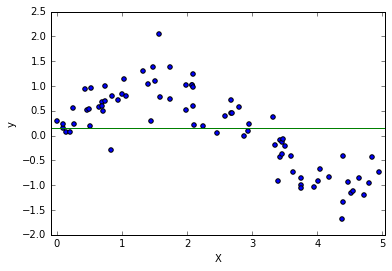

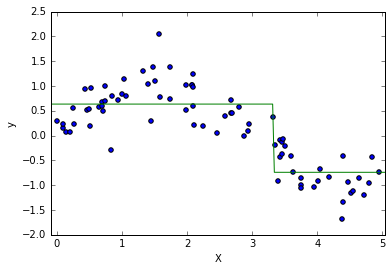

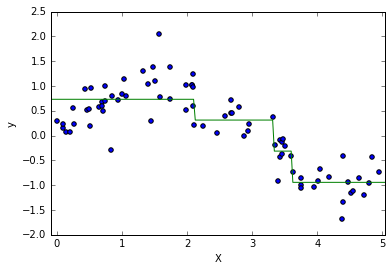

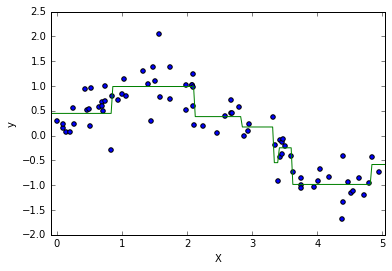

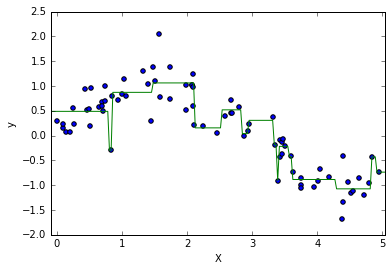

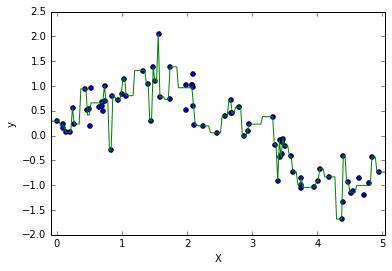

In [111]:
tree_reg = DummyRegressor().fit(X_toy, y_toy)
plot_regressor_decision(tree_reg, X_toy, y_toy)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

for depth in [1, 2, 3, 4, 8]:
    tree_reg = DecisionTreeRegressor(max_depth=depth).fit(X_toy, y_toy)
    plot_regressor_decision(tree_reg, X_toy, y_toy)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

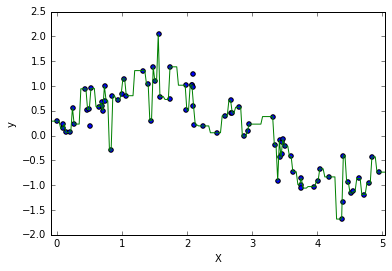

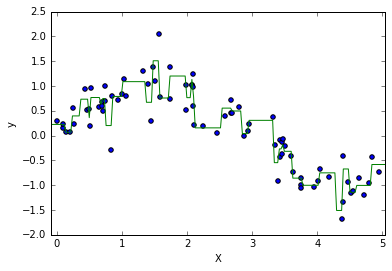

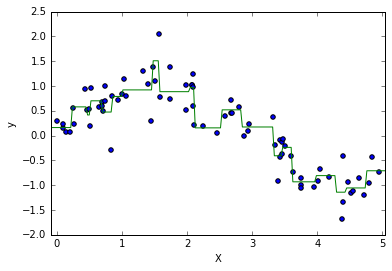

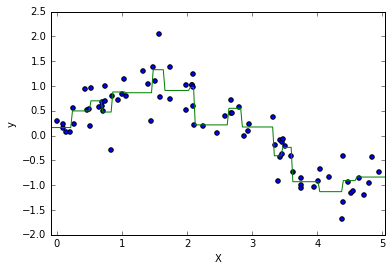

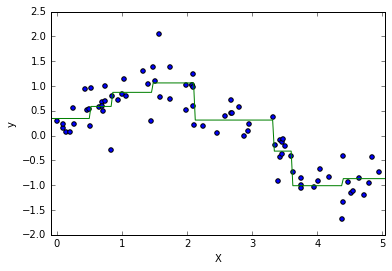

In [112]:
for depth in [1, 2, 3, 4, 8]:
    tree_reg = DecisionTreeRegressor(min_samples_leaf=depth).fit(X_toy, y_toy)
    plot_regressor_decision(tree_reg, X_toy, y_toy)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

## Decision trees for classification

(<matplotlib.text.Text at 0x202095c0>, <matplotlib.text.Text at 0x1fccc898>)

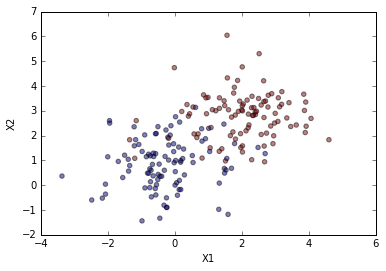

In [113]:
# generate two classes with features
from sklearn.datasets import make_blobs

X_toy, y_toy = make_blobs(n_samples=200, centers=[[0, 1], [2, 3]], random_state=14)
plt.scatter(X_toy[:, 0], X_toy[:, 1], c=y_toy, alpha=0.5)
plt.xlabel('X1'), plt.ylabel('X2')

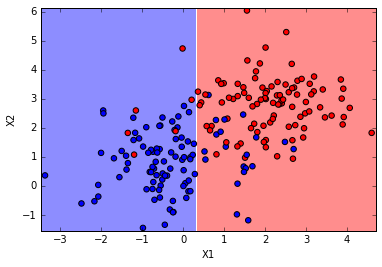

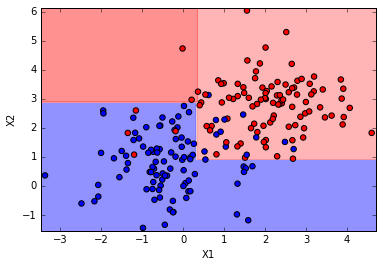

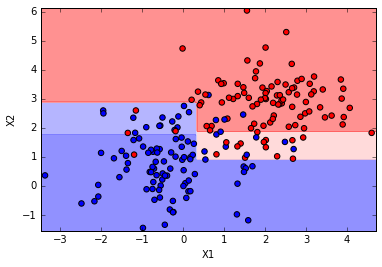

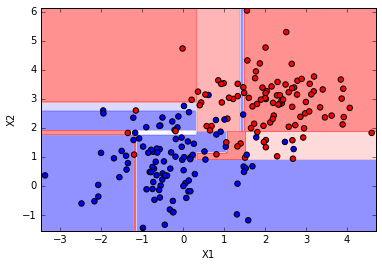

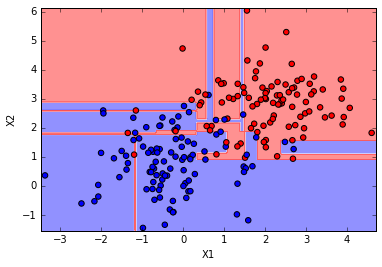

In [114]:
for depth in [1, 2, 3, 5, 10]:
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_toy, y_toy)
    plot_classifier_decision(tree_clf, X_toy, y_toy)
    plt.xlabel('X1'), plt.ylabel('X2')
    plt.show()

## Decision Tree notes:

- independent on features scale
- during classification decision tree returns probability
- pre-stopping matters (`max_depth`, `min_samples_leaf`)

## Logistic regression

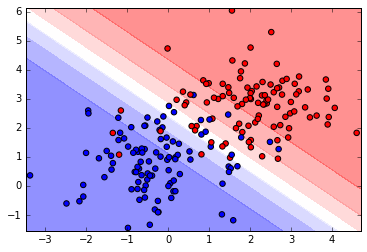

In [115]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_toy, y_toy)
plot_classifier_decision(clf, X_toy, y_toy)

## SVM + RBF kernel (generalized linear model)

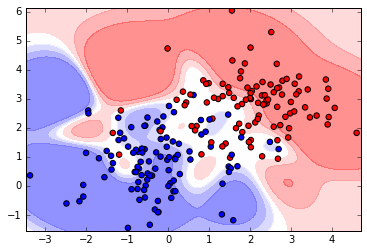

In [116]:
clf = SVC(C=10000., probability=True).fit(X_toy, y_toy) # C is inverse regularization
plot_classifier_decision(clf, X_toy, y_toy)

To get an idea of adding new features for linear models: https://www.youtube.com/watch?v=3liCbRZPrZA

# Back to wines

## KNN 

In [117]:
for n_neighbours in [1, 2, 3, 5, 7, 10, 20, 50]:
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbours)
    knn_reg.fit(trainX, trainY)
    print n_neighbours, mean_squared_error(testY, knn_reg.predict(testX)) 

1 0.774693877551
2 0.672857142857
3 0.648526077098
5 0.644897959184
7 0.646697209496
10 0.636065306122
20 0.637524489796
50 0.657922612245


In [118]:
for n_neighbours in [1, 2, 3, 5, 7, 10, 20, 50]:
    knn_reg = KNeighborsRegressor(metric='canberra', n_neighbors=n_neighbours)
    knn_reg.fit(trainX, trainY)
    print n_neighbours, mean_squared_error(testY, knn_reg.predict(testX)) 

1 0.623673469388
2 0.575510204082
3 0.526258503401
5 0.49946122449
7 0.507871720117
10 0.504236734694
20 0.506251020408
50 0.525772734694


## Pipelines with Standard Scaler

first standardize each variable, then use simple kNN

In [119]:
from sklearn.pipeline import make_pipeline

knn_pipe_reg = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
knn_pipe_reg.fit(trainX, trainY)

print mean_squared_error(testY, knn_pipe_reg.predict(testX))
print mean_squared_error(trainY, knn_pipe_reg.predict(trainX))

0.479053061224
0.339047100463


(2, 9)

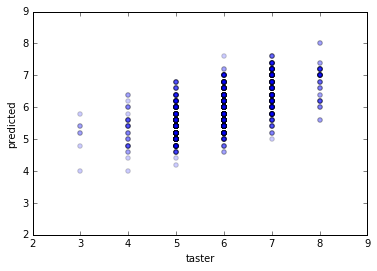

In [120]:
plt.scatter(testY, knn_pipe_reg.predict(testX), alpha=0.2)
plt.xlabel('taster'), plt.ylabel('predicted')
plt.xlim(2, 9)
plt.ylim(2, 9)

## Combining predictions

In [121]:
regressors = [
    DecisionTreeRegressor(max_depth=6),
    KNeighborsRegressor(metric='canberra', n_neighbors=5),
]

for reg in regressors:
    reg.fit(trainX, trainY)
    print mean_squared_error(testY, reg.predict(testX)), reg

0.544311115141 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
0.49946122449 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='canberra',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


Averaging total mse. We could use different coefficient to mix results

In [122]:
print mean_squared_error(testY, sum(reg.predict(testX) for reg in regressors) / len(regressors))
print mean_squared_error(trainY, sum(reg.predict(trainX) for reg in regressors) / len(regressors))

0.46120697745
0.349215747362


## kFolding 

One of cross-validation strategies, each sample is used once in testing

In [123]:
from sklearn.cross_validation import KFold

qualities = []
for train_indices, test_indices in KFold(len(X), n_folds=5):
    fold_trainX = X.iloc[train_indices, :]
    fold_testX  = X.iloc[test_indices, :]
    fold_trainY = y[train_indices]
    fold_testY  = y[test_indices]

    tree_reg = DecisionTreeRegressor(max_depth=10)
    tree_reg.fit(fold_trainX, fold_trainY)
    qualities.append(mean_squared_error(fold_testY, tree_reg.predict(fold_testX)))
    
print qualities

[0.81728984239014102, 0.96014537278257817, 0.70790696334010395, 0.79730620792192941, 0.66479124200741913]


# Homework (due to Monday, 1st Feb)

0. Compare using kFold which algorithm gives more stable (= less variation in MSE on testing) result: decision tree or linear regression?

1. Fine-tune the regression decision tree. Achieve minimal MSE using kFold cross-validation.
   Parameters to tune: `max_depth, min_samples_split, min_samples_leaf`

2. Split the data into two parts (50% each), on each part train a decision tree (with any parameters) and compare the structure of trees. Are they similar? <br /> (Below you have code to plot tree's structure)

3. Mix up knn, ridge with non-linear features and decision tree. Find appropriate coefficients in linear combination to get minimal MSE on a holdout.

4. (optional) Plot a reconstructed function in any couple of 'chemical' variables. 

When done homework, download the notebook with `File > Download as > Ipython notebook` (`File` is below jupyter logo!), rename to `2 - Your Surname - regression` and send to [icl.ml@yandex.ru](mailto:icl.ml@yandex.ru)

## Solution 1

In [29]:
import numpy as np
linear_qualities = []
for train_indices, test_indices in KFold(len(X), n_folds=5):
    fold_trainX = X.iloc[train_indices, :]
    fold_testX  = X.iloc[test_indices, :]
    fold_trainY = y[train_indices]
    fold_testY  = y[test_indices]
    
    ridge_reg = Ridge(alpha=10)
    ridge_reg.fit(fold_trainX, fold_trainY)
    linear_qualities.append(mean_squared_error(fold_testY, ridge_reg.predict(fold_testX)))
    
print linear_qualities, qualities
linear_qualities_arr = np.asarray(linear_qualities)
qualities_arr = np.asarray(qualities)

print "linear regression variance:", linear_qualities_arr.var(), 'decision tree regression variance:', qualities_arr.var()

[0.71060140032077146, 0.59734975359148557, 0.57470616782476813, 0.54720351210849105, 0.51651984596738321] [0.82668767559749812, 0.8951362635528709, 0.71167620361962569, 0.80040602129797045, 0.66091070644212757]
linear regression variance: 0.00441217409131 decision tree regression variance: 0.0069395063937


## linear regression gives more stable results

## Solution 2

In [30]:
import pandas as pd
qualities_depth = []
qualities_leaf = []
qualities_split = []

for train_indices, test_indices in KFold(len(X), n_folds=5):
    fold_trainX = X.iloc[train_indices, :]
    fold_testX  = X.iloc[test_indices, :]
    fold_trainY = y[train_indices]
    fold_testY  = y[test_indices]
    
    for max_depth in [1, 2, 4, 6, 8, 10]:
        tree_reg = DecisionTreeRegressor(max_depth=max_depth)
        tree_reg.fit(fold_trainX, fold_trainY)
        qualities_depth.append([max_depth, mean_squared_error(fold_testY, tree_reg.predict(fold_testX))])
        
    for min_samples_leaf in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
        tree_reg = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
        tree_reg.fit(fold_trainX, fold_trainY)
        qualities_leaf.append([min_samples_leaf, mean_squared_error(fold_testY, tree_reg.predict(fold_testX))])
        
    for min_samples_split in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
        tree_reg = DecisionTreeRegressor(min_samples_split=min_samples_split)
        tree_reg.fit(fold_trainX, fold_trainY)
        qualities_split.append([min_samples_split, mean_squared_error(fold_testY, tree_reg.predict(fold_testX))])

qualities_depth_pd=pd.DataFrame(qualities_depth, columns=["max_depth", 'mean_squared_error'])
qualities_leaf_pd=pd.DataFrame(qualities_leaf, columns=["min_samples_leaf", 'mean_squared_error'])
qualities_split_pd=pd.DataFrame(qualities_split, columns=["min_samples_split", 'mean_squared_error'])



In [31]:
for i in [1, 2, 4, 6, 8, 10]:
    print qualities_depth_pd[qualities_depth_pd['max_depth']==i].sum()/5


max_depth             1.00000
mean_squared_error    0.66502
dtype: float64
max_depth             2.000000
mean_squared_error    0.614588
dtype: float64
max_depth             4.00000
mean_squared_error    0.58651
dtype: float64
max_depth             6.000000
mean_squared_error    0.603221
dtype: float64
max_depth             8.000000
mean_squared_error    0.693359
dtype: float64
max_depth             10.000000
mean_squared_error     0.786736
dtype: float64


In [32]:
for i in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
    print qualities_leaf_pd[qualities_leaf_pd['min_samples_leaf']==i].sum()/5

min_samples_leaf      1.000000
mean_squared_error    1.117991
dtype: float64
min_samples_leaf      2.000000
mean_squared_error    0.990797
dtype: float64
min_samples_leaf      4.000000
mean_squared_error    0.853738
dtype: float64
min_samples_leaf      8.000000
mean_squared_error    0.742653
dtype: float64
min_samples_leaf      16.000000
mean_squared_error     0.658472
dtype: float64
min_samples_leaf      32.000000
mean_squared_error     0.617581
dtype: float64
min_samples_leaf      64.000000
mean_squared_error     0.586578
dtype: float64
min_samples_leaf      128.00000
mean_squared_error      0.59519
dtype: float64
min_samples_leaf      256.000000
mean_squared_error      0.602894
dtype: float64
min_samples_leaf      512.000000
mean_squared_error      0.602427
dtype: float64
min_samples_leaf      1024.000000
mean_squared_error       0.625923
dtype: float64


In [33]:
for i in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]:
    print qualities_split_pd[qualities_split_pd['min_samples_split']==i].sum()/5

min_samples_split     1.000000
mean_squared_error    1.114719
dtype: float64
min_samples_split     2.000000
mean_squared_error    1.115738
dtype: float64
min_samples_split     4.000000
mean_squared_error    1.063624
dtype: float64
min_samples_split     8.00000
mean_squared_error    1.00671
dtype: float64
min_samples_split     16.000000
mean_squared_error     0.902491
dtype: float64
min_samples_split     32.000000
mean_squared_error     0.776486
dtype: float64
min_samples_split     64.00000
mean_squared_error     0.70018
dtype: float64
min_samples_split     128.000000
mean_squared_error      0.648261
dtype: float64
min_samples_split     256.000000
mean_squared_error      0.594471
dtype: float64
min_samples_split     512.000000
mean_squared_error      0.587274
dtype: float64
min_samples_split     1024.000000
mean_squared_error       0.585664
dtype: float64
min_samples_split     2048.00000
mean_squared_error       0.63333
dtype: float64


## minimum MSE achieved when max_depth = 4, if the tree is too shallow or too deep MSE would increase
## also when min_samples_leaf = 64 gives minimum MSE. If the tree is too bushy then its unstable. if the tree is too sparse then it is not describing the data
## min_samples_split works similarily seems needing very large numbers for minimising MSE...probably due to any smaller numbers would lead to unstable tree

## Solution 3

In [34]:
# split the data
X1 = X.iloc[:len(X)/2,:]
X2 = X.iloc[len(X)/2:,:]
y1 = y[:len(y)/2]
y2 = y[len(y)/2:]
trainX1, testX1, trainY1, testY1 = train_test_split(X1, y1, random_state=42)
trainX2, testX2, trainY2, testY2 = train_test_split(X2, y2, random_state=42)


In [35]:
tree_reg1 = DecisionTreeRegressor(min_samples_leaf=64)
tree_reg1.fit(trainX1, trainY1)
print (mean_squared_error(testY1, tree_reg1.predict(testX1)))

tree_reg2 = DecisionTreeRegressor(min_samples_leaf=64)
tree_reg2.fit(trainX2, trainY2)
print (mean_squared_error(testY2, tree_reg1.predict(testX2)))

0.554720072389
0.609014232175


In [43]:
import pydot
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  

def plot_tree(tree, columns, max_depth):
    dot_data = StringIO()  
    export_graphviz(tree, out_file=dot_data, feature_names=columns, max_depth=max_depth)  
    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [46]:
plot_tree(tree_reg1, testX1.columns, max_depth=5)
plot_tree(tree_reg2, testX2.columns, max_depth=5)
## some problem with my pydot installation on my local PC which means the trees cannot be plotted unfortunately.
## However by looking at the mean squared error it looks like the two trees are very different

NameError: global name 'dot_parser' is not defined

## Solution 4Mix up knn, ridge with non-linear features and decision tree. Find appropriate coefficients in linear combination to get minimal MSE on a holdout


In [147]:
dt_reg = DecisionTreeRegressor(max_depth=6)#min_samples_leaf=64)
knn_reg = KNeighborsRegressor(metric='canberra', n_neighbors=5)
linear_reg = Ridge(alpha=10)

dt_reg.fit(trainX, trainY)
knn_reg.fit(trainX, trainY)
linear_reg.fit(trainX_extended, trainY)

print mean_squared_error(testY, dt_reg.predict(testX)), dt_reg
print mean_squared_error(testY, knn_reg.predict(testX)), knn_reg
print mean_squared_error(testY, linear_reg.predict(testX_extended)), linear_reg

0.544311115141 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
0.49946122449 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='canberra',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
0.516826197999 Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [148]:
def objfunction(x):
    return mean_squared_error(testY, (x[0]*dt_reg.predict(testX) + x[1]*knn_reg.predict(testX) + x[2]*linear_reg.predict(testX_extended)))

In [149]:
from scipy.optimize import minimize

#one minus the sum of all variables must be zero
cons = ({'type': 'eq', 'fun': lambda x:  1 - sum(x)})

#Required to have non negative values
bnds = ((0, 1), (0, 1),(0, 1))

res = minimize(objfunction, np.asarray([0.33, 0.33, 0.34]), bounds=bnds ,constraints=cons)



In [150]:
res

  status: 0
 success: True
    njev: 6
    nfev: 30
     fun: 0.44825850661477101
       x: array([ 0.19881423,  0.48795923,  0.31322654])
 message: 'Optimization terminated successfully.'
     jac: array([-0.10411691, -0.10411688, -0.10411692,  0.        ])
     nit: 6

## results: 0.19881423 for decision tree, 0.48795923 for knn and 0.31322654 for ridge with nonlinear features
## and the combined minimised MSE is 0.44825850661477101

In [27]:
import pydot
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  

def plot_tree(tree, columns, max_depth):
    dot_data = StringIO()  
    export_graphviz(tree, out_file=dot_data, feature_names=columns, max_depth=max_depth)  
    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [28]:
# If you have own installation of python, this may require installing graphviz and pydot
# plot_tree(tree_clf, X.columns, max_depth=3)